In [1]:
#important libraries 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
import numpy as np
from sklearn.preprocessing import LabelEncoder #(specially use to for only y )
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif

In [2]:
#read the data 
path ="C:/Users/mayur/Desktop/bank_churn_complete_module/bankchurn.csv"
data=pd.read_csv(path)
data.head()

,custid,surname,creditscore,country,gender,age,tenure,balance,active,salary,churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,101348.88,1
1,15647311,Hill,608,Spain,f,41,1,83807.86,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,79084.10,0


In [3]:
nc=data.select_dtypes(exclude='object').columns.values
fc=data.select_dtypes(include='object').columns.values

In [4]:
nc

array(['custid', 'creditscore', 'age', 'tenure', 'balance', 'active',
       'salary', 'churn'], dtype=object)

In [5]:
fc

array(['surname', 'country', 'gender'], dtype=object)

In [6]:
#0 check 
data[nc][data[nc]==0].count()

custid            0
creditscore       0
age               0
tenure          413
balance        3617
active         4849
salary            0
churn          7963
dtype: int64

In [7]:
data.country.value_counts()

France     4926
Spain      1540
Germany    1370
germany     784
Espanio     504
spain       433
Ger         355
Fra          50
france       38
Name: country, dtype: int64

In [8]:
data.surname.value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: surname, Length: 2932, dtype: int64

In [9]:
data.gender.value_counts()

Male      4140
Female    3041
m         1018
f          831
female     671
M          299
Name: gender, dtype: int64

In [10]:
data.gender[data.gender.isin(['f','female'])] = 'Female'

C:\Users\mayur\AppData\Local\Temp\ipykernel_29564\1770840303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.gender[data.gender.isin(['f','female'])] = 'Female'


In [11]:
data.gender[data.gender.isin(['m','M'])] = 'Male'

C:\Users\mayur\AppData\Local\Temp\ipykernel_29564\1096706893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.gender[data.gender.isin(['m','M'])] = 'Male'


In [12]:
data.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [13]:
data.country[data.country.isin(['Fra','france'])] = 'France'

C:\Users\mayur\AppData\Local\Temp\ipykernel_29564\3091956033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.country[data.country.isin(['Fra','france'])] = 'France'


In [14]:
data.country[data.country.isin(['Espanio','spain'])] = 'Spain'

C:\Users\mayur\AppData\Local\Temp\ipykernel_29564\4253792901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.country[data.country.isin(['Espanio','spain'])] = 'Spain'


In [15]:
data.country[data.country.isin(['germany','Ger'])] = 'Germany'

C:\Users\mayur\AppData\Local\Temp\ipykernel_29564\535850261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.country[data.country.isin(['germany','Ger'])] = 'Germany'


In [16]:
data.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [17]:
data.dtypes

custid           int64
surname         object
creditscore      int64
country         object
gender          object
age              int64
tenure           int64
balance        float64
active           int64
salary         float64
churn            int64
dtype: object

In [18]:
data.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [19]:
data.isnull().sum()

custid         0
surname        0
creditscore    0
country        0
gender         0
age            0
tenure         0
balance        0
active         0
salary         0
churn          0
dtype: int64

Text(0.5, 1.0, 'Y-value distribution')

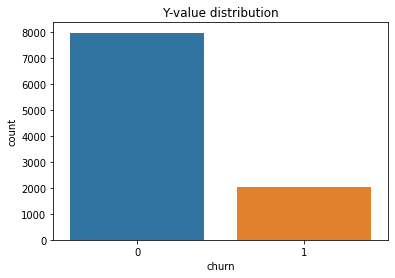

In [20]:
#count plot to check the y-distribution
sns.countplot(x='churn',data=data)
plt.title('Y-value distribution')

In [21]:
data

,custid,surname,creditscore,country,gender,age,tenure,balance,active,salary,churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,0,92888.52,1


In [22]:
#dummy varaibles --> is done to aviod baises ness
pd.get_dummies(data.gender).head(20)

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [23]:
pd.get_dummies(data.gender,drop_first=True).head(10)

,Male
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,1


In [26]:
new_data = data.drop(['custid','surname','gender','country'],axis=1)
new_data

,creditscore,age,tenure,balance,active,salary,churn
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,0,113931.57,1
3,699,39,1,0.00,0,93826.63,0
4,850,43,2,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,0,96270.64,0
9996,516,35,10,57369.61,1,101699.77,0
9997,709,36,7,0.00,1,42085.58,1
9998,772,42,3,75075.31,0,92888.52,1


In [27]:
new_data.head()

,creditscore,age,tenure,balance,active,salary,churn
0,619,42,2,0.00,1,101348.88,1
1,608,41,1,83807.86,1,112542.58,0
2,502,42,8,159660.80,0,113931.57,1
3,699,39,1,0.00,0,93826.63,0
4,850,43,2,125510.82,1,79084.10,0


In [28]:
dummy=pd.get_dummies(data['country'],drop_first=True,prefix='country')
new_data= new_data.join(dummy)
    

In [29]:
dummy=pd.get_dummies(data[ 'gender'],drop_first=True,prefix='gender')
new_data= new_data.join(dummy)
    

In [30]:
new_data

,creditscore,age,tenure,balance,active,salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,112542.58,0,0,1,0
2,502,42,8,159660.80,0,113931.57,1,0,0,0
3,699,39,1,0.00,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,0,92888.52,1,1,0,1


In [44]:
new_data.gender_Male.value_counts()

1    5457
0    4543
Name: gender_Male, dtype: int64

In [31]:
new_data.dtypes

creditscore          int64
age                  int64
tenure               int64
balance            float64
active               int64
salary             float64
churn                int64
country_Germany      uint8
country_Spain        uint8
gender_Male          uint8
dtype: object

In [32]:
#splirt the data into train and test
trainx,testx,trainy,testy = train_test_split(new_data.drop('churn',axis=1),new_data['churn'],test_size=0.25)

In [33]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(7500, 9),trainy=(7500,),testx=(2500, 9),testy =(2500,)


In [34]:
#build the logistic regression model using Logit()
m1=sm.Logit(trainy,trainx).fit()

Optimization terminated successfully.
         Current function value: 0.437809
         Iterations 6


In [35]:
#summary
m1.summary()
#coef -->log odd
#as tvalue increases, p area decreases
#that is why we say area less than 0.05 is significant , 
#the value greater than 1.645 is significant

#conf  ---> interval is lieing between - to + which involves zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7491
Method:                           MLE   Df Model:                            8
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                  0.1270
Time:                        03:19:21   Log-Likelihood:                -3283.6
converged:                       True   LL-Null:                       -3761.3
Covariance Type:            nonrobust   LLR p-value:                5.971e-201
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
creditscore        -0.0043      0.000    -21.993      0.000      -0.005      -0.004
age                 0.0558      0.003     20.745      0.000       0.051       0.061
tenure             -0.0488      0.010     -4.668      0.000      -0.069      -0.028
balance           1.84e-06   5.55e-07      3.317      0.001    7.53e-07    2.93e-06
active             -1.1179      0.065    -17.134      0.000      -1.246      -0.990
salary          -8.903e-07   5.26e-07     -1.694      0.090   -1.92e-06     1.4e-07
country_Germany     0.6965      0.077      9.030      0.000       0.545       0.848
country_Spain      -0.0893      0.080     -1.111      0.266      -0.247       0.068
gender_Male        -0.6193      0.061    -10.088      0.000      -0.740      -0.499
===================================================================================
"""

In [36]:
#prediction on the test data
p1 = m1.predict(testx)
p1

8839    0.203603
3122    0.130417
3373    0.234867
4999    0.145990
4472    0.279607
          ...   
6199    0.326834
6000    0.108636
7905    0.040425
1327    0.025719
9859    0.263371
Length: 2500, dtype: float64

In [37]:
#converting probabilities into classes 
p1_Y = p1.copy()
p1_Y[p1_Y < 0.5] = 0
p1_Y[p1_Y > 0.5] = 1

In [38]:
#confusion matrix
confusion_matrix(testy,p1_Y)

array([[1899,   70],
       [ 419,  112]], dtype=int64)

In [39]:
df=pd.DataFrame({'actual':testy,'predicted':p1_Y})

In [40]:
pd.crosstab(df.actual,df.predicted,margins=True)

predicted,0.0,1.0,All
actual,,,
0,1899,70,1969
1,419,112,531
All,2318,182,2500


In [41]:
#classification_report
print(classification_report(testy,p1_Y))
#f1-score greater the score more is the weightage

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1969
           1       0.62      0.21      0.31       531

    accuracy                           0.80      2500
   macro avg       0.72      0.59      0.60      2500
weighted avg       0.78      0.80      0.76      2500



In [42]:
##accuracy score
print(accuracy_score(testy,p1_Y))

0.8044


In [46]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(testy, p1))
print('MSE:', metrics.mean_squared_error(testy, p1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testy, p1)))

MAE: 0.28671644307512817
MSE: 0.14398720716758798
RMSE: 0.37945646280909223


In [49]:
import pickle
# open a file, where you ant to store the data
file = open('bankchurn_logit_model.pkl', 'wb')

# dump information to that file
pickle.dump(m1, file)